<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Camion_de_Transporte_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
''' EJERCICIO 1
La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:


       ^
       |
  1/20-|--  /|\
       |   / | \
       |  /  |  \
       | /   |   \
       |/_ __| __ \ __ __ >
      0 190 210 230

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?
(a) Resolver analíticamente.
(b) Resolver por simulación.
'''


' EJERCICIO 1\nLa empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial\npara el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.\nEl peso de cada tina sigue la siguiente distribución de probabilidad:\n\n\n       ^\n       |\n  1/20-|--  /|       |   / |        |  /  |         | /   |          |/_ __| __ \\ __ __ >\n      0 190 210 230\n\nSi la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso\nde las tinas exceda la capacidad del camión?\n(a) Resolver analíticamente.\n(b) Resolver por simulación.\n'

# **a) Solución Analítica**



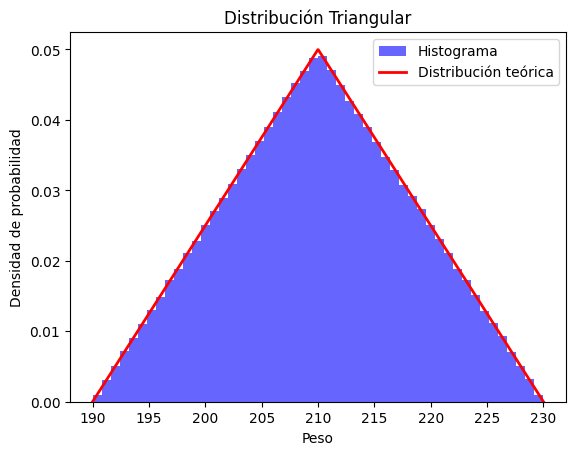

In [3]:

import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang
import math

# Parámetros de la distribución triangular
a = 190.0
b = 230.0
c = 210.0

# Generar múltiples valores aleatorios a partir de la distribución triangular
repeticiones = 1000000
valores = [random.triangular(a, b, c) for _ in range(repeticiones)]

# Crear el histograma de los valores generados
plt.hist(valores, bins=50, density=True, alpha=0.6, color='b', label='Histograma')

# Graficar la distribución teórica triangular
# La función triang necesita el parámetro c como proporción entre 0 y 1
c_scaled = (c - a) / (b - a)
x = np.linspace(a, b, 1000)
plt.plot(x, triang.pdf(x, c_scaled, loc=a, scale=b-a), 'r-', lw=2, label='Distribución teórica')

# Añadir etiquetas y leyenda
plt.xlabel('Peso')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Triangular')
plt.legend()

# Mostrar la gráfica
plt.show()



In [4]:
#Calculamos la media, la varianza  y la desviación estandar

media= (a+b+c)/3
print("La media de esta distribución es:",media)
varianza=((a**2)+(b**2)+(c**2)-(a*b)-(a*c)-(b*c))/18
print("La varianza de esta distribución es:",varianza)
desviacion_estandar=math.sqrt(varianza)
print("La desviación estandar de esta distribución es:",desviacion_estandar)


La media de esta distribución es: 210.0
La varianza de esta distribución es: 66.66666666666667
La desviación estandar de esta distribución es: 8.16496580927726


# *Teorema central del limite*

"Dada una sucesión de variables aleatorias independientes e idénticamente distribuidas,
x_1, x_2, ..., con media finita μ y varianza finita σ^2 se cumple que:"

$$
\lim_{n \to \infty} P\left(\frac{x_1 + x_2 + \cdots + x_n - n \mu}{\sigma \sqrt{n}} < x\right) = \Phi(x)
$$

En nuestro caso n=5 porque cargaremos el camión con 5 tinas

$$
 P\left({x_1 + x_2 + \cdots + x_5} > 1000kg\right)
$$

Equivalentemente tenemos que P es:

$$
P\left({(x_1 + x_2 + \cdots + x_5)} < 1000kg\right) =  P\left(\frac{x_1 + x_2 + \cdots + x_5}5 > 200kg\right)
$$

Aplicando el teorema tenemos que:
$$
\lim_{n \to \infty} P\left(\
\frac{{x_1 + x_2 + \cdots + x_5 }}{{\frac{{5\sigma}}{{\sqrt{5}}}}} < \frac{200 - \mu}{{\frac{{\sigma}}{{\sqrt{5}}}}}\right)
$$

Simplificando tenemos

$$
\lim_{n \to \infty} P\left(\frac{{\sqrt{5} (x_1 + x_2 + \cdots + x_5)}}{5\sigma} < \frac{\sqrt{5}(200 - \mu)}{\sigma}\right)
$$



In [5]:
#operaciones

print("primera:",math.sqrt(5))
print("segunda:",5*desviacion_estandar)
print("tercera:",((math.sqrt(5))*(200-media))/desviacion_estandar)


primera: 2.23606797749979
segunda: 40.824829046386306
tercera: -2.7386127875258306


Sustituyendo valores tenemos que:

$$
\lim_{n \to \infty} P\left(\frac{{2.23(x_1 + x_2 + \cdots + x_5)}}{40.82} < -2.74\right)
$$


Buscando en las tablas de valores de **Z** para *z = -2.74*, obtenemos el siguiente resultado:
$$\ 0.0031 $$
Por lo tanto,

$$
\ P = 1 - 0.0031 = 99.69\%
$$


# **b) Solución por simulación**

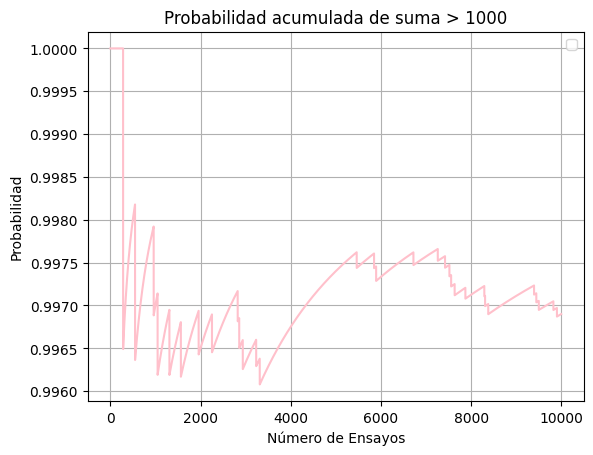

Probabilidad final = 0.9969


In [31]:
#1.- Generar las variables aleatorias x_1,...,x_5

numero_de_ensayos = 10000
sumas = []
probabilidades = []

contador = 0

for ensayo in range(numero_de_ensayos):
    suma_variables = 0
    for i in range(5):
        U = random.uniform(0, 1)
        if 0 <= U <= 0.5:
            X = a + math.sqrt(U * (b - a) * (c - a))
        else:
            X = b - math.sqrt((1 - U) * (b - a) * (b - c))
        suma_variables += X
    sumas.append(suma_variables)

    if suma_variables > 1000:
        contador += 1

    probabilidad_actual = contador / (ensayo + 1)  # ensayo + 1 para evitar división por cero y ajustar el índice
    probabilidades.append(probabilidad_actual)

# Graficar las probabilidades
plt.plot(probabilidades, color='pink')
plt.xlabel('Número de Ensayos')
plt.ylabel('Probabilidad')
plt.title('Probabilidad acumulada de suma > 1000')
plt.grid(True)
plt.legend()
plt.show()

print("Probabilidad final =", probabilidades[-1])


In [ ]:
'''
EJERCICIO 2:
Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de $200. También suponga que el costo promedio anual de un
nuevo camión es de $60,000. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?
'''


# **a)Solución analítica**

*Consideraciones:*


1.   Si la capacidad se excede,se envia 1 tina mediante otro medio con un costo de $200

2.   Si no se quisiera recurrir a otro medio, el costo de adquirir otro camión es de $60,000

Calculamos los dias trabajados al año:
Datos:


1.   5 dias x semana de trabajo
2.   Hay 52 semanas al año



$$
5 \times 52 = 260 \ \text{días de trabajo por año}
$$

Entonces, sabemos que la probabilidad de que se exceda la capacidad del camion es de 99.66 % por lo tanto, podemos definir li siguiente:

$$
\ 260 { \text{ días}} = 100\%
$$

$$
\ x{\text{ días}} = 99.66\%
$$

por lo tanto, $$ x= 259{\text{ días}}$$

Hagamos una compración de las dos opciones disponibles


1.   Envio mediante alquiler:
$$ Costo= $200*259{\text{ días}}$$
$$ Costo= $51,800$$

2.   En la compra de una unidad adicional de carga tenemos que le costaria a la compañia $60,000

*Conclusión:*

Vemos que nos es más barato el enviar el exceso de peso mediante otra compañia que el comprar una nueva unidad de carga





# **b)Solución por simulación**

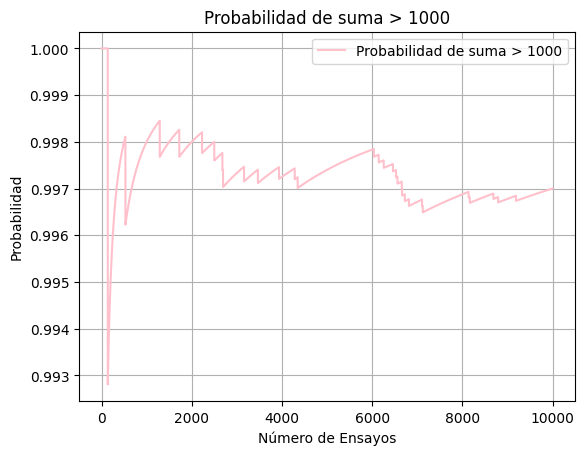

Probabilidad final = 0.997
Costo promedio del exceso de capacidad = 51844.0
Costo promedio de comprar un nuevo camión = 60000
Enviar el exceso de peso mediante otra compañía es más barato.


In [72]:

# Consideraciones
dias_trabajo_anual = 260
costo_exceso = 200
costo_camion = 60000

contador = 0
costo_total_exceso = 0
costo_total_camion = 0

probabilidades = []
costos_exceso = []

for ensayo in range(numero_de_ensayos):
    suma_variables = 0
    for i in range(5):
        U = random.uniform(0, 1)
        if 0 <= U <= 0.5:
            X = a + math.sqrt(U * (b - a) * (c - a))
        else:
            X = b - math.sqrt((1 - U) * (b - a) * (b - c))
        suma_variables += X
    sumas.append(suma_variables)
    if suma_variables > 1000:
        contador += 1
        costo_total_exceso += costo_exceso * dias_trabajo_anual

    probabilidad_actual = contador / (ensayo + 1)
    probabilidades.append(probabilidad_actual)

    costo_promedio_exceso = costo_total_exceso / (ensayo + 1)
    costos_exceso.append(costo_promedio_exceso)

# Graficar probabilidades
plt.plot(probabilidades, color='pink', label='Probabilidad de suma > 1000')
plt.xlabel('Número de Ensayos')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de suma > 1000')
plt.grid(True)
plt.legend()
plt.show()

print("Probabilidad final =", probabilidades[-1])
print("Costo promedio del exceso de capacidad =", costos_exceso[-1])
print("Costo promedio de comprar un nuevo camión =", costo_camion)
# Conclusión
if costo_promedio_exceso < costo_camion:
    print("Enviar el exceso de peso mediante otra compañía es más barato.")
else:
    print("Comprar una nueva unidad de carga es más barato.")
